In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import collections
import re
import csv
from collections import defaultdict
from collections import Counter
from sklearn import preprocessing

#%matplotlib inline

In [2]:
from os.path import join

In [3]:
df = pd.read_csv('Reviews.csv', sep=',', error_bad_lines=False, index_col=False)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'HelpfulnessDenominator', 'HelpfulnessNumerator'], axis = 1, inplace = True)
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


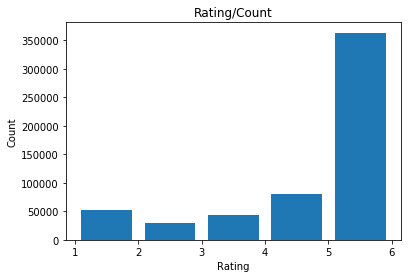

In [5]:
x = df['Score']

bins=[1, 2, 3, 4, 5, 6]

plt.ylabel('Count')
plt.xlabel('Rating')
plt.title('Rating/Count')
plt.hist(x, bins, histtype='bar', rwidth=0.8)

plt.show()

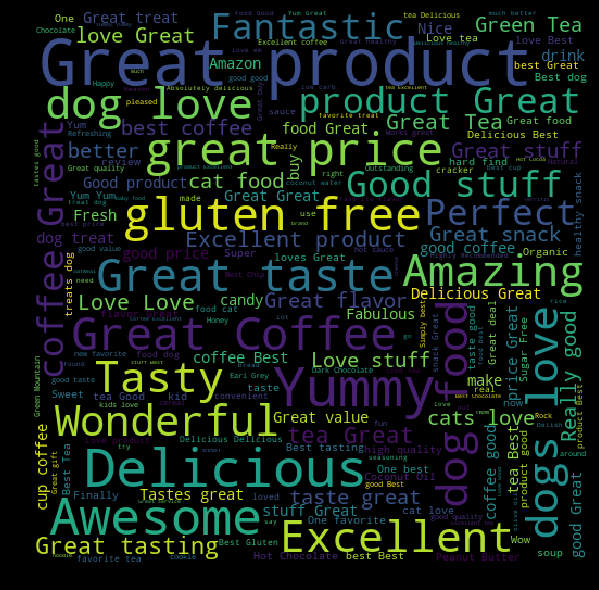

In [6]:
posWords = ' '.join(list(df[df['Score'] == 5]['Summary']))
pos_wc = WordCloud(width = 512,height = 512).generate(posWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(pos_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

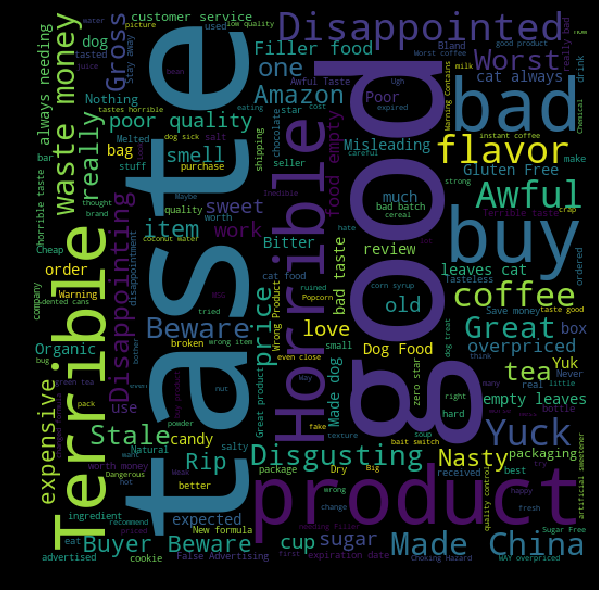

In [7]:
negWords = ' '.join(list(df[df['Score'] == 1]['Summary']))
neg_wc = WordCloud(width = 512,height = 512).generate(negWords)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(neg_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [8]:
count_row = df.shape[0] #row count df.shape
print(count_row)


568454


In [9]:
odf = df
odf.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
odf['Score'] = df[df['Score'] != 3].replace({1:0, 2:0, 4:1, 5:1})
odf.head()

,Score,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,"""Delight"" says it all",This is a confection that has been around a fe...
3,0,Cough Medicine,If you are looking for the secret ingredient i...
4,1,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
odf['Text Word Count'] = df['Text'].str.count(' ')+1
#odf['Summary ! Count'] = df['Summary'].str.count('!')
odf.head()

,Score,Summary,Text,Text Word Count
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43
4,1,Great taffy,Great taffy at a great price. There was a wid...,30


In [12]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

odf['SummStopless'] = odf['Summary'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop)]))
odf.head()

,Score,Summary,Text,Text Word Count,SummStopless
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,Good Quality Dog Food
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,Not Advertised
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,"""Delight"" says"
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,Cough Medicine
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,Great taffy


In [13]:
#Counter(" ".join(df["Summary"])).split()).most_common(5)

In [14]:
#pd.Series(' '.join(df['Summary'].str).split()).value_counts()[:5]

In [15]:
words = (df.Summary
           .str.lower()
           .str.cat(sep=' ')
           .split()
)
words

['good',
 'quality',
 'dog',
 'food',
 'not',
 'as',
 'advertised',
 '"delight"',
 'says',
 'it',
 'all',
 'cough',
 'medicine',
 'great',
 'taffy',
 'nice',
 'taffy',
 'great!',
 'just',
 'as',
 'good',
 'as',
 'the',
 'expensive',
 'brands!',
 'wonderful,',
 'tasty',
 'taffy',
 'yay',
 'barley',
 'healthy',
 'dog',
 'food',
 'the',
 'best',
 'hot',
 'sauce',
 'in',
 'the',
 'world',
 'my',
 'cats',
 'love',
 'this',
 '"diet"',
 'food',
 'better',
 'than',
 'their',
 'regular',
 'food',
 'my',
 'cats',
 'are',
 'not',
 'fans',
 'of',
 'the',
 'new',
 'food',
 'fresh',
 'and',
 'greasy!',
 'strawberry',
 'twizzlers',
 '-',
 'yummy',
 'lots',
 'of',
 'twizzlers,',
 'just',
 'what',
 'you',
 'expect.',
 'poor',
 'taste',
 'love',
 'it!',
 'great',
 'sweet',
 'candy!',
 'home',
 'delivered',
 'twizlers',
 'always',
 'fresh',
 'twizzlers',
 'delicious',
 'product!',
 'twizzlers',
 'please',
 'sell',
 'these',
 'in',
 'mexico!!',
 'twizzlers',
 '-',
 'strawberry',
 'nasty',
 'no',
 'flavor'

In [16]:
most_common_0 = ''
most_common_1 = ''

for text, score in zip(odf['SummStopless'].str.lower(), odf['Score']):
    if score == 1:
        most_common_1 += ' ' + str(text)
    else:
        most_common_0 += ' ' + str(text)

        
c = Counter(most_common_1.split())
print(c.most_common(5)) # change to the number you want to analyze

d = Counter(most_common_0.split())
print(d.most_common(5)) 

#mixing with wordclud, we will choose the most relevant words from here
#Words for positive (score = 1):Great, good, best, love, delicious
#Words for negative:Not, price, disappointed, terrible, horrible

[('great', 63219), ('good', 36161), ('best', 29712), ('love', 25224), ('coffee', 16869)]
[('not', 13654), ('good', 7631), ('i', 5321), ('taste', 4944), ('like', 4904)]


In [17]:
#def most_common(words):
#    return max(set(words), key=lst.count)
#print(words)

In [18]:
#df['Summary'].str.split()
#' '.join(df['Summary'].str.split().values)
#sentences = df['Summary'].str.split().values
#print(sentences.shape)
#sentences.reshape(1, -1)

In [19]:
odf['Great'] = odf["Summary"].str.contains("great", case=False, na=False).astype(int)
odf['Good'] = odf["Summary"].str.contains("good", case=False, na=False).astype(int)
odf['Best'] = odf["Summary"].str.contains("best", case=False, na=False).astype(int)
odf['Delicious'] = odf["Summary"].str.contains("delicious", case=False, na=False).astype(int)
odf['Love'] = odf["Summary"].str.contains("love", case=False, na=False).astype(int)

#df['Great'] = [1 if 'great' in s.lower() else 0 for s in df['Summary']]
#df['Great'] = df['Summary'].apply(lambda x: 'great' in x.lower())
#df["Great"] = np.where(df["Summary"].str.lower().contains("great", na=False), '1', '0')
#if df["Summary"].str.lower().str.contains("great", na=False) == True:
odf.head()

,Score,Summary,Text,Text Word Count,SummStopless,Great,Good,Best,Delicious,Love
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,Good Quality Dog Food,0,1,0,0,0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,Not Advertised,0,0,0,0,0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,"""Delight"" says",0,0,0,0,0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,Cough Medicine,0,0,0,0,0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,Great taffy,1,0,0,0,0


In [20]:
odf['Overall Positive Point'] = odf['Great'] + odf['Good'] + odf['Best'] + odf['Delicious'] + odf['Love'] 
odf.head()

,Score,Summary,Text,Text Word Count,SummStopless,Great,Good,Best,Delicious,Love,Overall Positive Point
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,Good Quality Dog Food,0,1,0,0,0,1
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,Not Advertised,0,0,0,0,0,0
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,"""Delight"" says",0,0,0,0,0,0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,Cough Medicine,0,0,0,0,0,0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,Great taffy,1,0,0,0,0,1


In [21]:
odf['Not'] = odf["Summary"].str.contains("not", case=False, na=False).astype(int)
odf['Price'] = odf["Summary"].str.contains("price", case=False, na=False).astype(int)
odf['Terrible'] = odf["Summary"].str.contains("terrible", case=False, na=False).astype(int)
odf['Horrible'] = odf["Summary"].str.contains("horrible", case=False, na=False).astype(int)
odf['Disappointed'] = odf["Summary"].str.contains("disappointed", case=False, na=False).astype(int)


In [22]:
odf['Overall Negative Point'] = odf['Not'] + odf['Price'] + odf['Terrible'] + odf['Horrible'] + odf['Disappointed']
odf.head()

,Score,Summary,Text,Text Word Count,SummStopless,Great,Good,Best,Delicious,Love,Overall Positive Point,Not,Price,Terrible,Horrible,Disappointed,Overall Negative Point
0,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,49,Good Quality Dog Food,0,1,0,0,0,1,0,0,0,0,0,0
1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,Not Advertised,0,0,0,0,0,0,1,0,0,0,0,1
2,1,"""Delight"" says it all",This is a confection that has been around a fe...,99,"""Delight"" says",0,0,0,0,0,0,0,0,0,0,0,0
3,0,Cough Medicine,If you are looking for the secret ingredient i...,43,Cough Medicine,0,0,0,0,0,0,0,0,0,0,0,0
4,1,Great taffy,Great taffy at a great price. There was a wid...,30,Great taffy,1,0,0,0,0,1,0,0,0,0,0,0


In [23]:
ndf = odf

In [24]:
ndf.drop(['Great','Good','Best','Delicious','Disappointed', 'Love', 'Not', 'Price', 'Terrible', 'Horrible'], axis = 1, inplace = True)

In [25]:
ndf.drop(['Summary','Text'], axis = 1, inplace = True)

In [26]:
ndf.drop(['SummStopless'], axis = 1, inplace = True)
ndf.head()

,Score,Text Word Count,Overall Positive Point,Overall Negative Point
0,1,49,1,0
1,0,31,0,1
2,1,99,0,0
3,0,43,0,0
4,1,30,1,0


In [27]:
ndf.dropna(how="any")


,Score,Text Word Count,Overall Positive Point,Overall Negative Point
0,1,49,1,0
1,0,31,0,1
2,1,99,0,0
3,0,43,0,0
4,1,30,1,0
5,1,72,0,0
6,1,53,2,0
7,1,28,0,0
8,1,26,0,0
9,1,25,0,0


In [28]:
#from sklearn import tree
ndf=ndf.dropna()


#model = tree.DecisionTreeClassifier()

In [29]:
from sklearn.model_selection import train_test_split
X = ndf.drop('Score', axis=1) # these are features
y = ndf['Score']
y=y.astype('int')
# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Let's try with k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
# We can use our model to predict values in the test as
y_pred = knn.predict(X_test)

In [32]:
from sklearn import metrics

print("Accuracy of the model with k = 5 :",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 : 0.8395788640893392


In [33]:
# Trying with k = 7
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)
print("Accuracy of the model with k = 7 :",metrics.accuracy_score(y_test, y_pred_7))

Accuracy of the model with k = 7 : 0.8477946658146576


In [34]:
accuracy_list = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(metrics.accuracy_score(y_test, y_pred))

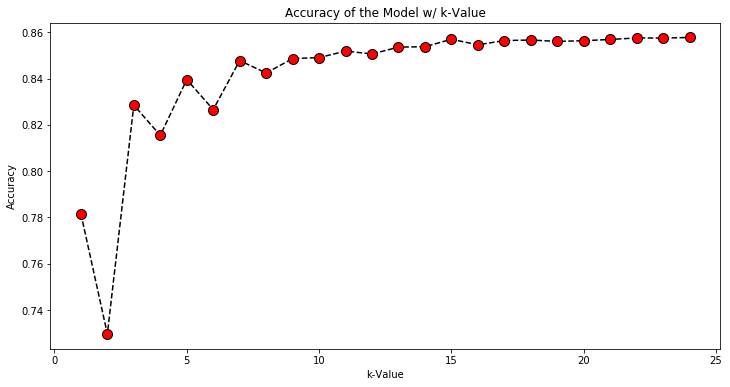

In [35]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [36]:
normalized_df = (df-df.mean()) / df.std()

In [37]:
normalized_df.head()

,Score,Text Word Count,Overall Positive Point,Overall Negative Point
0,0.429954,-0.408448,1.241181,-0.318854
1,-2.32583,-0.631201,-0.745154,2.979786
2,0.429954,0.210309,-0.745154,-0.318854
3,-2.32583,-0.482699,-0.745154,-0.318854
4,0.429954,-0.643576,1.241181,-0.318854


In [38]:

X_norm  = ndf.drop('Score', axis=1) # these are features
y = ndf['Score']
y=y.astype('int')
# 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size= 0.25, random_state = 42)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("Accuracy of the model with k = 5 and using normalized features: ",metrics.accuracy_score(y_test, y_pred))

Accuracy of the model with k = 5 and using normalized features:  0.8395788640893392


In [40]:
accuracy_list_norm = []
for k in range (1, 25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list_norm.append(metrics.accuracy_score(y_test, y_pred))

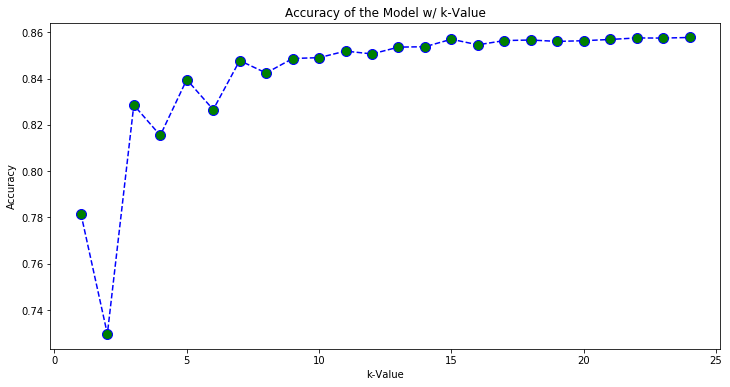

In [41]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 25), accuracy_list_norm, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()